Supervised Learning
Chapter 1

In [16]:
#Calling required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
#Reading in the required data
directory = 'C:\\Users\\Cathal Keating\\Desktop\\DataCamp\\Supervised Learning\\'
churn_df = pd.read_csv(directory + 'telecom_churn_clean.csv')

print(churn_df.describe())

       Unnamed: 0  account_length    area_code  international_plan  \
count  3333.00000     3333.000000  3333.000000         3333.000000   
mean   1666.00000      101.064806   437.182418            0.096910   
std     962.29855       39.822106    42.371290            0.295879   
min       0.00000        1.000000   408.000000            0.000000   
25%     833.00000       74.000000   408.000000            0.000000   
50%    1666.00000      101.000000   415.000000            0.000000   
75%    2499.00000      127.000000   510.000000            0.000000   
max    3332.00000      243.000000   510.000000            1.000000   

       voice_mail_plan  number_vmail_messages  total_day_minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000       

The syntax works like this:
1. Import the model needed from sklearn
from sklearn.module import Model
2. Set the model
model = model()
3.Fit the model
model.fit(X, y)
4. Run the predictions
predictions = model.predict(x_new)
5. Print the predictions
print(predictions)


In [9]:
#K Nearest Neighbours Example:
#Calling the KNN model
from sklearn.neighbors import KNeighborsClassifier
#Extract the independent (X) and depented (y) variables for the dataframe and convert into numpy array
X = churn_df[['total_day_charge', 'total_eve_charge']].values
#print(X[:, 0:4])
y = churn_df['churn'].values
#print(X.shape, y.shape)
#Setting the model
knn = KNeighborsClassifier(n_neighbors=15)
#Fit to the data
knn.fit(X, y)
#Creating the new data to predict off
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])
#Run the prediction
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))


Predictions: [1 0 0]


Running the models is fine but are they accurate?
To access accuracy we need to calc the following:

accuracy = correct predictions / total observations

to do this we split the data set into training and testing set
Run the model on the training set
Apply to the test set
Then check the accuracy of this test set

In [11]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
#set the model
knn = KNeighborsClassifier(n_neighbors=6)
#Fit the model to the train data
knn.fit(X_train, y_train)
#calculate the accuracy on the test data
print(knn.score(X_test, y_test))

0.872


In [14]:
#Lets vary n_neighbors and see what happens:
#set up the dictionaries
train_accuracies = {}
test_accuracies = {}
#list the neighbors to test
neighbors = np.arange(1, 26)
#loop through and record the accuracy
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

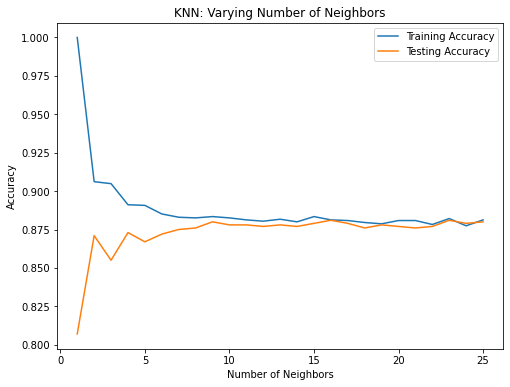

In [17]:
#lets plot these accuracies
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [18]:
#same as above just in a table
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
 {1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541} 
 {1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


Chapter 2 Regeression

In [20]:
#Reading in the required data
diabetes_df = pd.read_csv(directory + 'diabetes_clean.csv')
print(diabetes_df.head())
print(diabetes_df.describe())
print(diabetes_df.columns)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
       pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000

In [23]:
#Remeber we need to creat our independent and dependent variables
#Independent variable (the one we are trying to predict) is blood glucose level:
y = diabetes_df['glucose'].values #.values to convert to numpy array
#Our dependent varaibles is everything else so drop glucose
X = diabetes_df.drop('glucose', axis = 1).values
#have a quick look
#print(X)
#print(y)
print(X.shape, y.shape)

(768, 8) (768,)


In [32]:
#First example is making a prediction just based on BMI
#Extracing BMI from x
#The code is wrong - says 3 but should be 4
#Think this might be to do with the order I dropped glucose in
X_bmi = X[:, 4]
print(X_bmi.shape, y.shape)
#shapes are off - need to look into this
#Reshape X_bmi
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768,) (768,)
(768, 1)


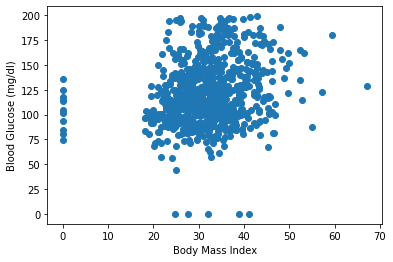

In [33]:
#Initial look at the relationship:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()
#There are a few 0's here that I am not comfortable with

In [34]:
#lets fit our regression
#remeber the steps - import package - set model - fit model - make the prediction
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

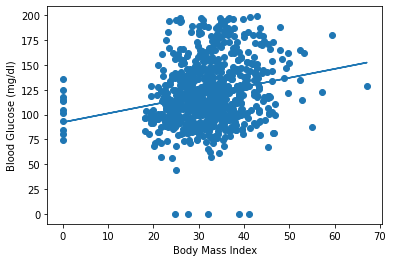

In [37]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions) #for each bmi plot the predicted glucose
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [40]:
#Lets preform a similar analysis but instead of just using BMI lets fit all parameters
#remeber the steps - import package - set model - fit model - make the prediction
from sklearn.linear_model import LinearRegression
#Just need to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print(y_pred)

[119.91303675  95.70325357 104.63962314 114.05040231 118.58321727
 127.12240463 101.32326148 109.68914522 114.03971568 123.60324707
 124.99713549 112.30131897 151.83921306 120.08016862  99.38245855
 137.26590828  98.92170524 103.54780373 124.48277405 138.98291632
 114.94730968 108.01568548  94.81640369 104.61880645 115.5808436
 129.44870188  94.22207529 105.35660341 135.62224377 116.96796741
 132.2906766  152.69963123 149.45755335 128.2848374  129.10818568
 144.78293146 112.09337022 133.52916199 113.45464867 126.11093124
 102.62046077 120.53135451 114.54168207 137.65315875 107.95068535
 148.70812727 155.6870585   98.79913503 121.11416209 145.42843867
  94.44116407 150.979827   164.44641014 133.12283053 116.16435787
 100.29525093 120.43548843  86.16602491 110.89528052 136.71958446
 129.92989495 100.63738165 150.5625166  162.71481898 111.44659132
  93.97800499  97.23726423 147.29609874 108.16823291 177.09990371
 134.07657778 105.99534102 116.13294836 130.57323796 106.06582896
 116.537966

In [44]:
#Lets test the accuracy
#For a linear regression - using teh .score method give an R Squared value
print(reg_all.score(X_test, y_test))

#For regression we can also look a the MSE (Mean square error) and the RMSE (root)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred, squared=False))

#Little extra to look at teh predictions vs the actual values
#print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))
print("Predictions: {}, Actual Values: {}".format(y_pred, y_test))

0.2828046881037516
26.341459582232257
Predictions: [119.91303675  95.70325357 104.63962314 114.05040231 118.58321727
 127.12240463 101.32326148 109.68914522 114.03971568 123.60324707
 124.99713549 112.30131897 151.83921306 120.08016862  99.38245855
 137.26590828  98.92170524 103.54780373 124.48277405 138.98291632
 114.94730968 108.01568548  94.81640369 104.61880645 115.5808436
 129.44870188  94.22207529 105.35660341 135.62224377 116.96796741
 132.2906766  152.69963123 149.45755335 128.2848374  129.10818568
 144.78293146 112.09337022 133.52916199 113.45464867 126.11093124
 102.62046077 120.53135451 114.54168207 137.65315875 107.95068535
 148.70812727 155.6870585   98.79913503 121.11416209 145.42843867
  94.44116407 150.979827   164.44641014 133.12283053 116.16435787
 100.29525093 120.43548843  86.16602491 110.89528052 136.71958446
 129.92989495 100.63738165 150.5625166  162.71481898 111.44659132
  93.97800499  97.23726423 147.29609874 108.16823291 177.09990371
 134.07657778 105.99534102

Cross validation
The problem is in the way you split the data, it could lead to inaccuracies due to specific data points
split into 5 folds say
save fold1 as you test and the rest as your training
fit model and compute metric of interest
move on to the next fold and repeat


In [45]:
#required package:
from sklearn.model_selection import cross_val_score, KFold
#set up your folds - we will pick 6
kf = KFold(n_splits=6, shuffle = True, random_state=42)
#set the model
reg = LinearRegression()
#Generate the cross val results
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


We are going to now look at two methods of regularised regression
this is where we scale the coefficents so that no one coefficent will skew results

In [47]:
#Ridge regression
#This is OLS + alpha * sum of squares
#we pick alpha
#similar set up to usual regression:
#Pick your package and model
from sklearn.linear_model import Ridge
#create a list to hold our R2 values
scores = []
#going to loop through various alphas

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    #set the model
    ridge = Ridge(alpha = alpha)
    #fit the model on teh training data
    ridge.fit(X_train, y_train)
    #predict on the test data (I dont think this is needed)
    y_pred = ridge.predict(X_test)
    #add the R2 value to the list scores
    scores.append(ridge.score(X_test, y_test))
    
print(scores)

[0.282846662322222, 0.28320633574804754, 0.2853000732200003, 0.26423984812668133, 0.1929242469410093]


In [48]:
#Lasso regression
#Similar to ridge except it is the absolute value of coefficents
#Essentially same code as ridge with a few tweeks
from sklearn.linear_model import Lasso
#create a list to hold our R2 values
scores = []
#going to loop through various alphas

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    #set the model
    lasso = Lasso(alpha = alpha)
    #fit the model on teh training data
    lasso.fit(X_train, y_train)
    #predict on the test data (I dont think this is needed)
    y_pred = lasso.predict(X_test)
    #add the R2 value to the list scores
    scores.append(lasso.score(X_test, y_test))
    
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273882, 0.18127361610181125, 0.15679544303617965]


Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object')


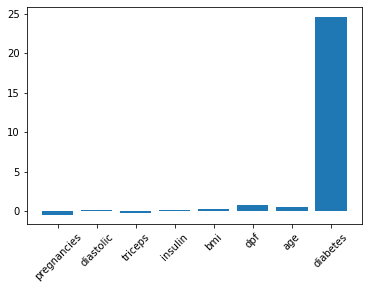

In [49]:
#Lasso for feature selection
#we can also use lasso to decide what feature to include in the model
from sklearn.linear_model import Lasso
#This time work off the entire dataset rather then train/test
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values
#pull out the factor names
names = diabetes_df.drop('glucose', axis=1).columns
print(names)
#fit the model
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
#Plot the coefficents
plt.bar(names, lasso_coef)
plt.xticks(rotation = 45)
plt.show()

Chapter 3 

In [54]:
#Testing how good the model is
#Looking at precision recall and F1

from sklearn.metrics import classification_report, confusion_matrix
#redoing the splits as I think I undid them in the previous
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

#going to fit a knn classification
#set the model
knn = KNeighborsClassifier(n_neighbors = 7)
#fit the model
knn.fit(X_train, y_train)
#make prediction
y_pred = knn.predict(X_test)

#First confusion matrix
print(confusion_matrix(y_test, y_pred))

#Second print the classification report
print(classification_report(y_test, y_pred))

[[1111   27]
 [ 142   54]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



Logistic Regression and ROC

In [58]:
#Loading the required package
from sklearn.linear_model import LogisticRegression
#Looking at Churn Data again
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#set the model
logreg = LogisticRegression()
#Fit the model
logreg.fit(X_train, y_train)
#Make a prediction
y_pred = logreg.predict(X_test)
print(y_pred)

print(logreg.score(X_test, y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [64]:
#We can use the logistic model to predict probabilities of churning for each point
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])
#I think this is prob of churn for each data point

0.18826020038112687


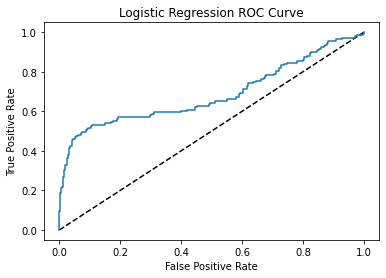

In [69]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve
#we now get the true positive, false positive and threshold numbers
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
#print(fpr)
#print(tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [70]:
#We can also calculate this score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


In [73]:
#Hyper parameter tuning
#mash of kfolds and alpha adjustment 

#requiired package
from sklearn.model_selection import GridSearchCV
#set up my kfolds
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
#set up the alpha interator - not sure what the solver is
param_grid = {"alpha" : np.arange(0.00001, 1, 10), "solver" : ["sag", "lsqr"]}
#set the model
ridge = Ridge()
#create the gridsearchcv
ridge_cv = GridSearchCV(ridge, param_grid, cv = kf)
#fit the model
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 1e-05, 'solver': 'lsqr'} 0.03525257192370172
